<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!


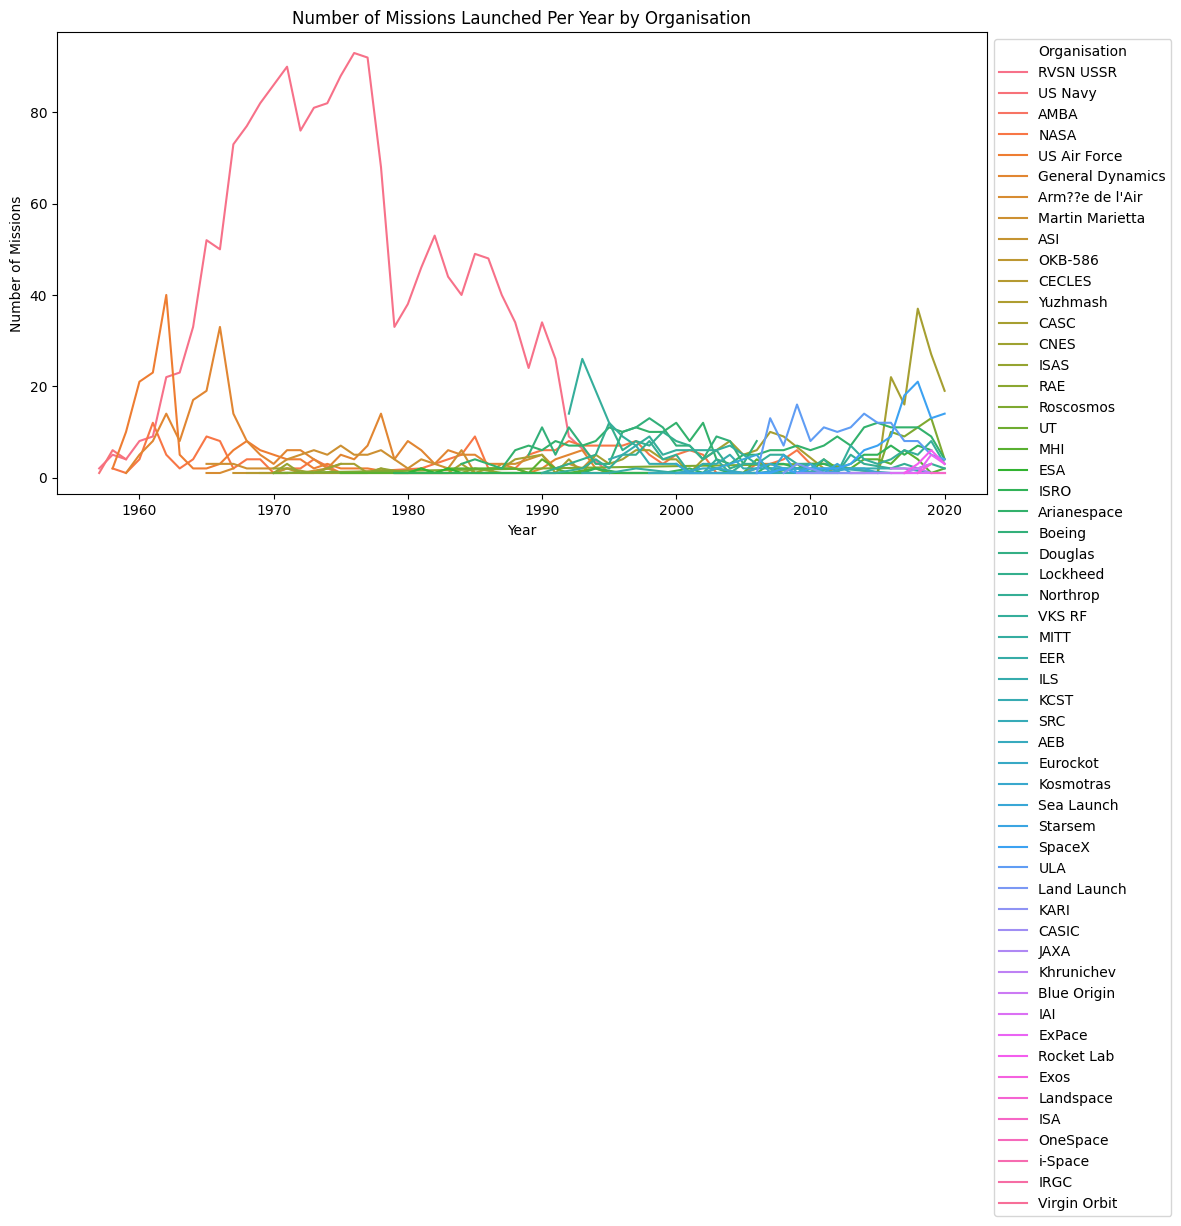

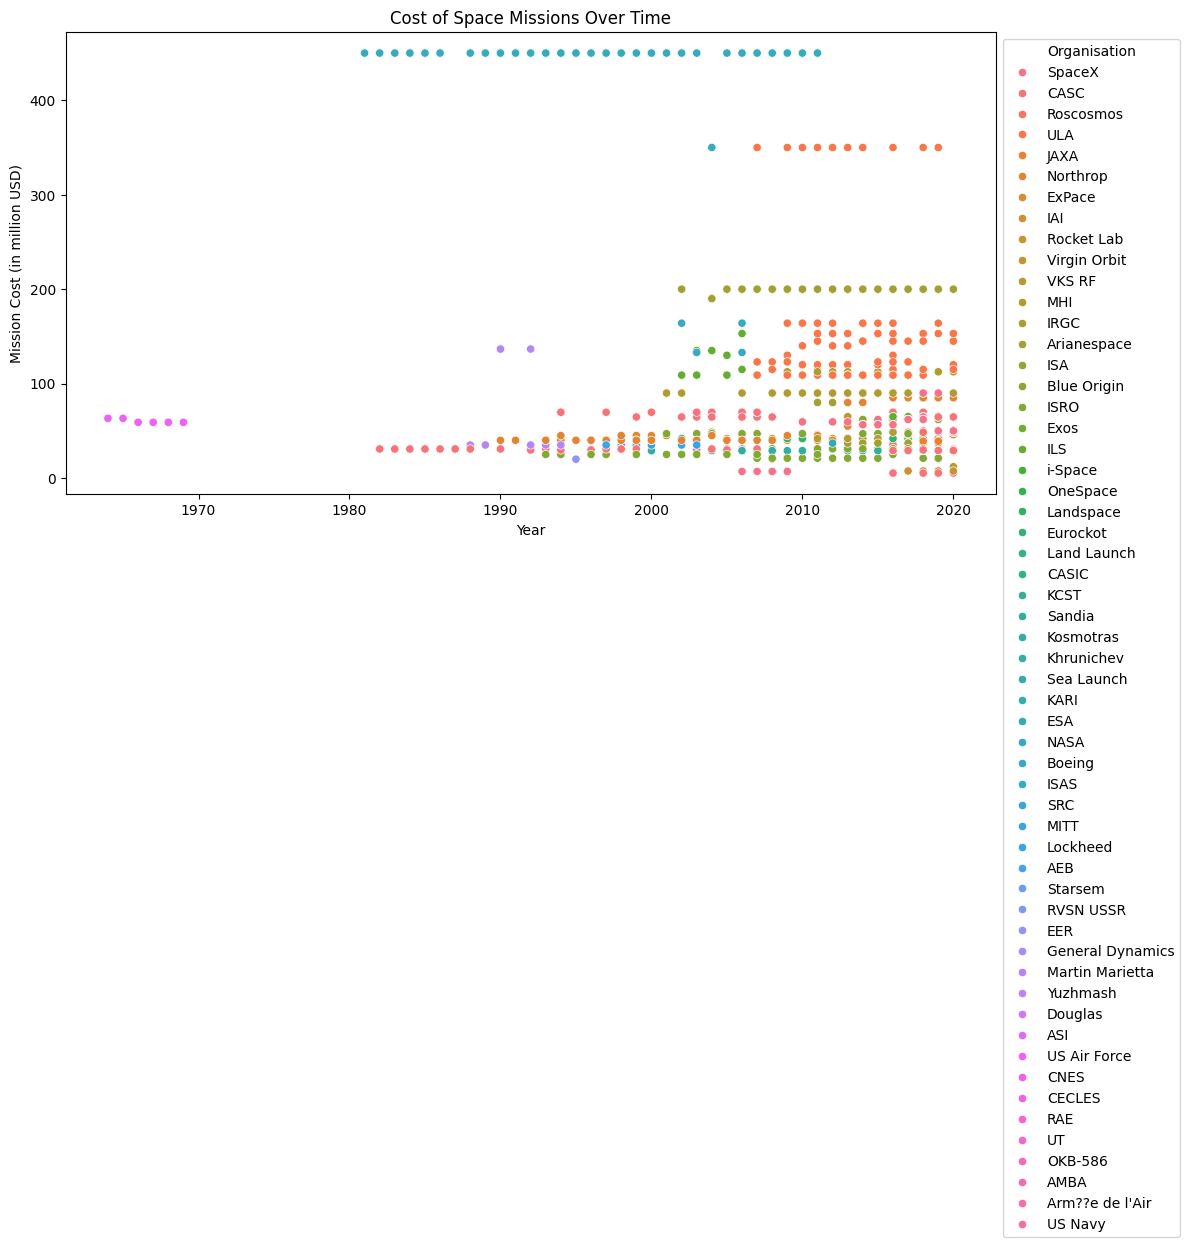

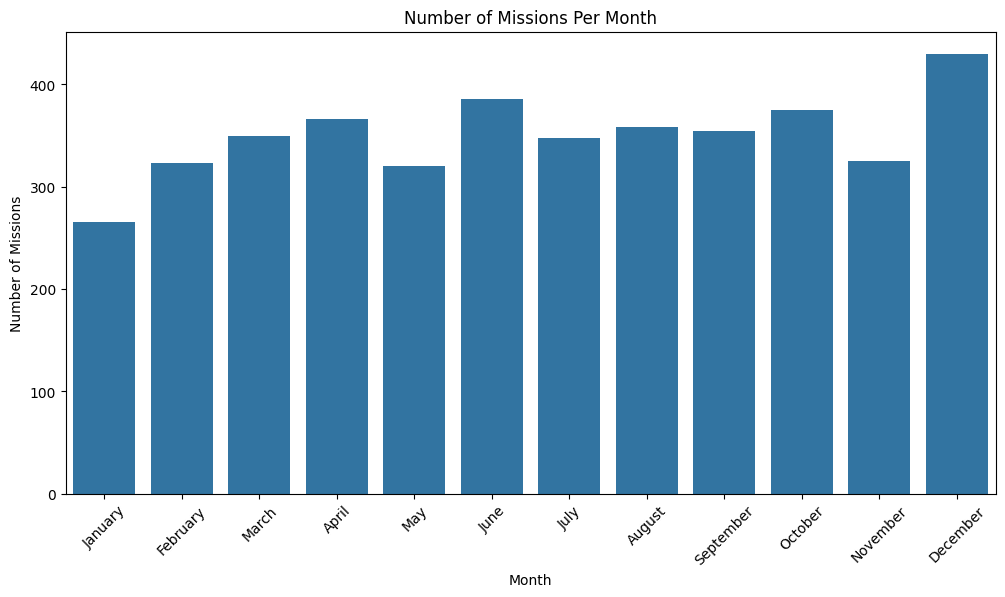

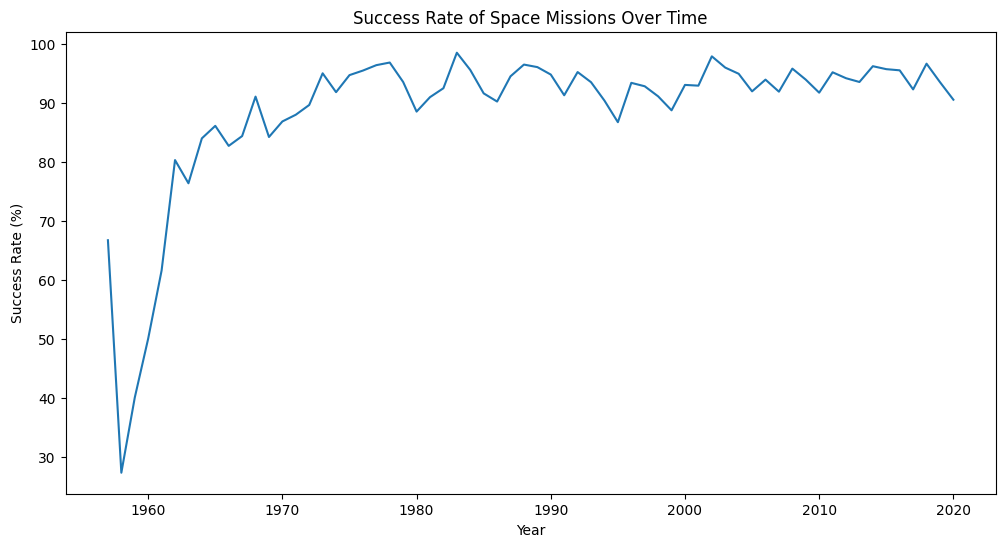

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_file_path = r"C:\Users\User\Desktop\python corse\Analyse and Visualise the Space Race\mission_launches.csv"
df = pd.read_csv(csv_file_path, encoding="utf-8")

df = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0"], errors='ignore')
df["Date"] = pd.to_datetime(df["Date"], errors="coerce", utc=True)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

df["Year"] = df["Date"].dt.year
missions_per_year = df.groupby(["Year", "Organisation"]).size().reset_index(name="Mission_Count")

plt.figure(figsize=(12, 6))
sns.lineplot(data=missions_per_year, x="Year", y="Mission_Count", hue="Organisation")
plt.title("Number of Missions Launched Per Year by Organisation")
plt.xlabel("Year")
plt.ylabel("Number of Missions")
plt.legend(title="Organisation", bbox_to_anchor=(1, 1))
plt.show()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="Year", y="Price", hue="Organisation")
plt.title("Cost of Space Missions Over Time")
plt.xlabel("Year")
plt.ylabel("Mission Cost (in million USD)")
plt.legend(title="Organisation", bbox_to_anchor=(1, 1))
plt.show()

df["Month"] = df["Date"].dt.month_name()
month_counts = df["Month"].value_counts().reindex(
    ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
)

plt.figure(figsize=(12, 6))
sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title("Number of Missions Per Month")
plt.xlabel("Month")
plt.ylabel("Number of Missions")
plt.xticks(rotation=45)
plt.show()

success_rate = df.groupby("Year")["Mission_Status"].value_counts().unstack().fillna(0)
success_rate["Success Rate"] = success_rate["Success"] / success_rate.sum(axis=1) * 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=success_rate, x=success_rate.index, y="Success Rate")
plt.title("Success Rate of Space Missions Over Time")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.show()
